In [18]:
import pandas as pd
import numpy as np
import operator
data_103=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/103年來臺旅客消費及動向調查.csv')
data_104=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/104年來臺旅客消費及動向調查(原始資料).csv')
data_105=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/105年來臺旅客消費及動向調查(原始資料).csv')
#data_106=pd.read_csv('/Users/Mac/Desktop/103_106消費及動向/106年來臺旅客消費及動向調查(原始資料).csv')
print(data_103.info())
print(data_104.info())
print(data_105.info())
#print(data106.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Columns: 251 entries, id to area
dtypes: int64(131), object(120)
memory usage: 11.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7239 entries, 0 to 7238
Columns: 252 entries, id to area
dtypes: int64(134), object(118)
memory usage: 13.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Columns: 252 entries, id to area
dtypes: int64(133), object(119)
memory usage: 13.9+ MB
None


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
data_103=data_103[['nation','purp1','sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
data_104=data_104[['nation','purp1','sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
data_105=data_105[['nation','purp1','sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
t_data=pd.concat([data_103,data_104,data_105],axis=0) #合併dataframe
#data_106=data_106[['nation','sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
print(t_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20484 entries, 0 to 7211
Data columns (total 17 columns):
nation    20484 non-null int64
purp1     20484 non-null int64
sp01      20484 non-null object
sp02      20484 non-null object
sp03      20484 non-null object
sp04      20484 non-null object
sp05      20484 non-null object
sp06      20484 non-null object
sp07      20484 non-null object
sp08      20484 non-null object
sp09      20484 non-null object
sp10      20484 non-null object
sp11      20484 non-null object
sp12      20484 non-null object
sp13      20484 non-null object
sp14      20484 non-null object
sp15      20484 non-null object
dtypes: int64(2), object(15)
memory usage: 2.8+ MB
None


In [20]:
t_data=t_data.convert_objects(convert_numeric=True)
t_data=t_data[t_data['purp1']==1]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [198]:
jp_data=t_data[t_data['nation']==1]
ch_data=t_data[t_data['nation']==2]
ko_data=t_data[t_data['nation']==5]
as_data=t_data[t_data['nation'].isin([4,6])]

In [150]:
def spot_dict(country_data):
    spot={}
    country_data=country_data[['sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
    for i in country_data.columns:
        for j in range(len(list(country_data[i]))):
            if list(country_data[i])[j]>0:
                if list(country_data[i])[j] not in spot:
                    spot[list(country_data[i])[j]]=1
                else:
                    spot[list(country_data[i])[j]]+=1
    #spot=sorted(spot.items(), key=operator.itemgetter(1), reverse=True)
    return spot

def to_frame(i_spot):
    i_list1=list(i_spot.keys())
    i_list2=list(i_spot.values())
    i_dict={'id':i_list1, 'number':i_list2}
    i_spot=pd.DataFrame.from_dict(i_dict)
    i_spot=i_spot.sort_values(by=['number'],ascending=False)
    i_spot=i_spot.iloc[0:20,]
    ss=0
    for v in list(i_spot['number']):
        ss+=v**2
    mrs=np.sqrt(ss)
    i_spot['num_std']=i_spot['number']/mrs
    return i_spot

In [151]:
jp_spot=spot_dict(jp_data)
jp_spot=to_frame(jp_spot)
jp_spot

,id,number,num_std
14,65.0,1558,0.482858
1,801.0,1403,0.434820
22,1.0,1169,0.362298
4,2.0,1091,0.338125
16,8.0,953,0.295355
24,3.0,951,0.294736
21,5.0,542,0.167978
38,19.0,510,0.158060
15,52.0,500,0.154961
40,6.0,468,0.145043


In [200]:
as_spot=spot_dict(as_data)
as_spot=to_frame(as_spot)
as_spot

,id,number,num_std
36,5.0,697,0.409033
27,1.0,647,0.379691
25,65.0,634,0.372061
3,801.0,626,0.367367
22,66.0,482,0.282861
4,185.0,380,0.223002
1,843.0,380,0.223002
62,3.0,330,0.193660
26,187.0,308,0.180749
5,803.0,302,0.177228


In [152]:
ch_spot=spot_dict(ch_data)
ch_spot=to_frame(ch_spot)
ch_spot

,id,number,num_std
16,1.0,6510,0.374943
36,2.0,6096,0.351099
22,315.0,5334,0.307212
37,185.0,4944,0.284750
83,18.0,4712,0.271388
59,3.0,4391,0.252900
35,350.0,4337,0.249790
9,235.0,4271,0.245988
1,801.0,3785,0.217997
75,271.0,3760,0.216557


In [153]:
ko_spot=spot_dict(ko_data)
ko_spot=to_frame(ko_spot)
ko_spot

,id,number,num_std
7,65.0,916,0.431611
1,801.0,894,0.421245
26,8.0,682,0.321352
8,67.0,667,0.314284
34,5.0,660,0.310986
9,2.0,628,0.295908
23,66.0,603,0.284128
18,1.0,586,0.276118
36,3.0,466,0.219575
3,10.0,226,0.106489


In [202]:
#整理出所有國家遊客的top10景點
spot_list=list(jp_spot['id'])+list(ch_spot['id'])+list(ko_spot['id']+list(as_spot['id']))
spot_list=list(set(spot_list))
spot_name=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/spot_name.csv')
spot_name=spot_name.convert_objects(convert_numeric=True)
all_spot=spot_name[spot_name['id'].isin(spot_list)]  #用isin()來挑出id有在spot_list裡的rows
all_spot.to_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/all_spot.csv')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


In [205]:
#畫地圖函式
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def draw_map(all_spot2,country):
    plt.figure(figsize=(32,16)) #開一張圖
    plt.title(country)
    m = Basemap(llcrnrlon = 119.3, llcrnrlat = 21, urcrnrlon = 123, urcrnrlat = 26,resolution = 'h', epsg = 3415) #使用basemap 定位在台灣附近的經緯度
    m.drawcoastlines() #畫出線條
    m.readshapefile('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/mapdata201805310314/COUNTY_MOI_1070516','COUNTY_MOI_1070516') #導入行政區劃圖 （檔名要重複兩次）
    #以下是畫上景點
    for s in range(len(list(all_spot2['id']))):   
        lon=list(all_spot2['lon'])[s]
        lat=list(all_spot2['lat'])[s]
        num=list(all_spot2['num_std'])[s]
        x, y = m(lon, lat)
        m.scatter(x, y, marker = 'o', color = 'm',s=num*600) #marker=>形狀  color=>顏色  s=>大小 
    plt.show()
    
def draw_map_newTaipei(all_spot2,country):
    plt.figure(figsize=(24,12)) #開一張圖
    plt.title(country)
    m = Basemap(llcrnrlon = 121.149265, llcrnrlat = 24.9, urcrnrlon = 122.076999, urcrnrlat = 25.376272,resolution = 'h', epsg = 3415) #使用basemap 定位在新北附近的經緯度
    m.drawcoastlines() #畫出線條
    m.readshapefile('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/mapdata201805310314/COUNTY_MOI_1070516','COUNTY_MOI_1070516') #導入行政區劃圖 （檔名要重複兩次）
    #以下是畫上景點
    for s in range(len(list(all_spot2['id']))):   
        lon=list(all_spot2['lon'])[s]
        lat=list(all_spot2['lat'])[s]
        num=list(all_spot2['num_std'])[s]
        x, y = m(lon, lat)
        m.scatter(x, y, marker = 'o', color = 'm',s=num*2000) #marker=>形狀  color=>顏色  s=>大小 
    plt.show()

In [203]:
all_spot2=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/all_spot_2.csv')
all_spot2=all_spot2.convert_objects(convert_numeric=True)
all_spot2=all_spot2[['id','name','lon','lat']]

#以下為join各國top 10的frame以及景點位置的frame
jp_spot2=pd.merge(jp_spot,all_spot2 ,how='inner', on='id')
ch_spot2=pd.merge(ch_spot,all_spot2 ,how='inner', on='id')
ko_spot2=pd.merge(ko_spot,all_spot2 ,how='inner', on='id')
as_spot2=pd.merge(as_spot,all_spot2 ,how='inner', on='id')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


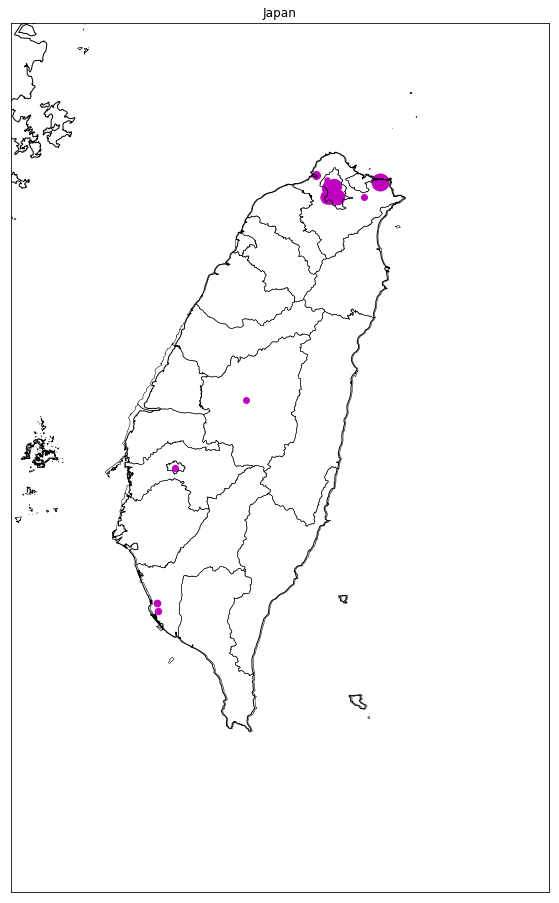

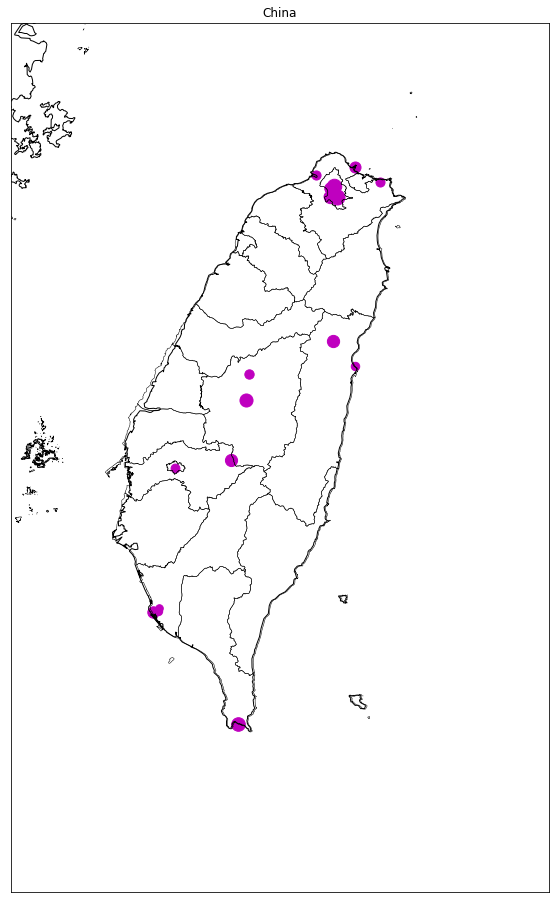

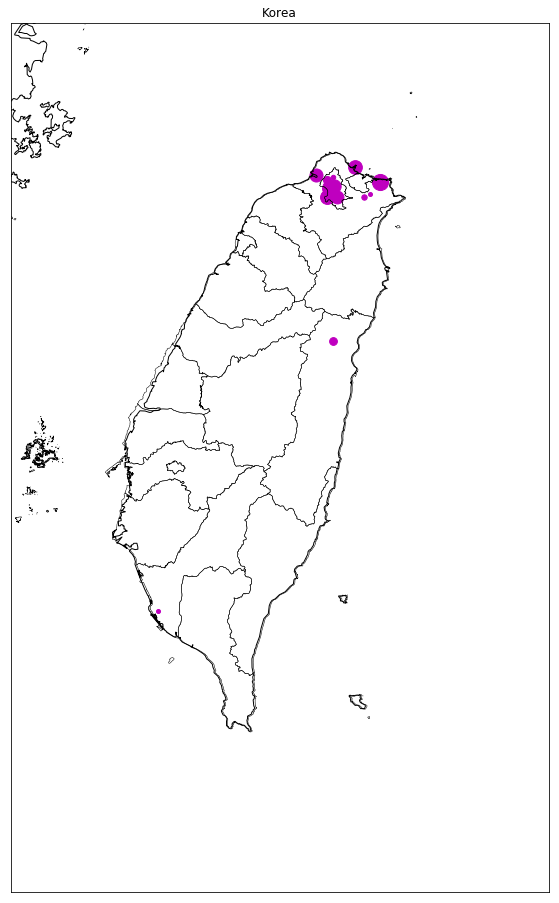

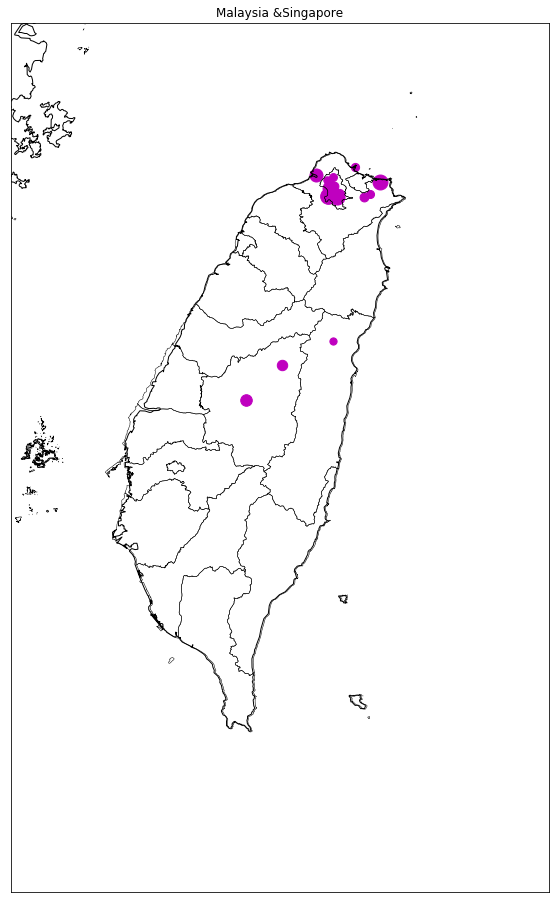

In [207]:
draw_map(jp_spot2,'Japan')
draw_map(ch_spot2,'China')
draw_map(ko_spot2,'Korea')
draw_map(as_spot2,'Malaysia &Singapore')

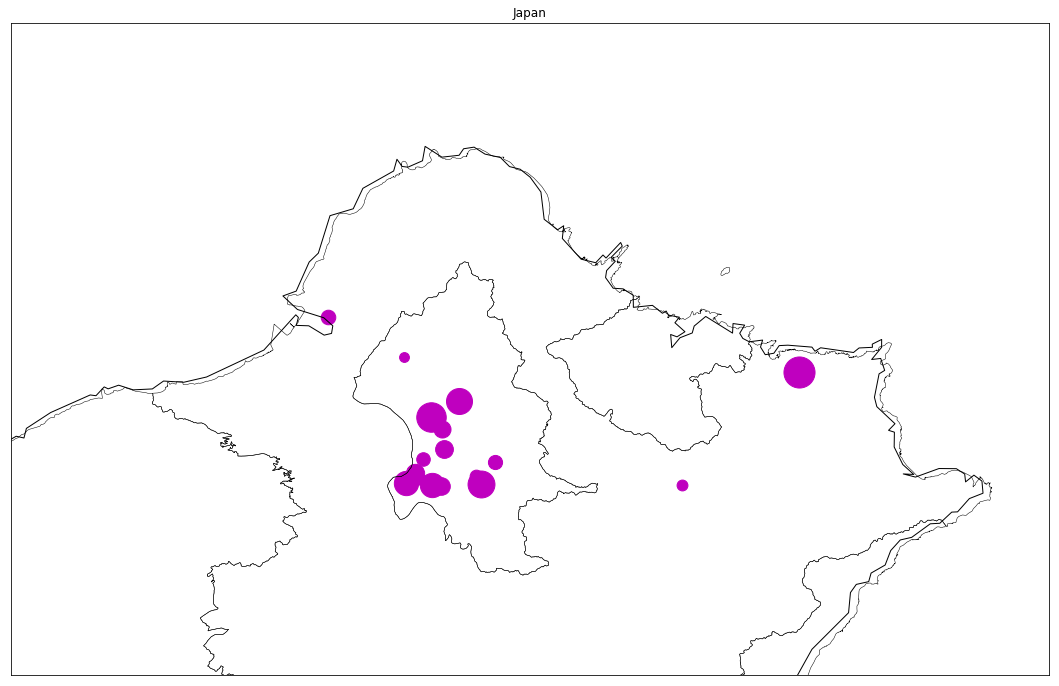

In [188]:
draw_map_newTaipei(jp_spot2,'Japan')

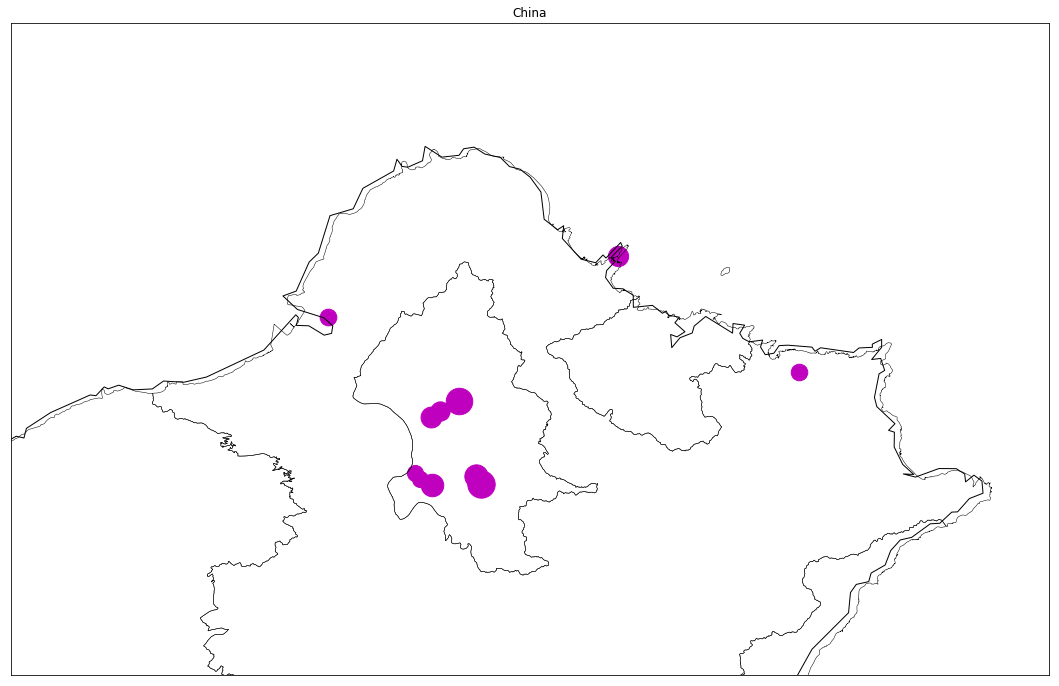

In [189]:
draw_map_newTaipei(ch_spot2,'China')

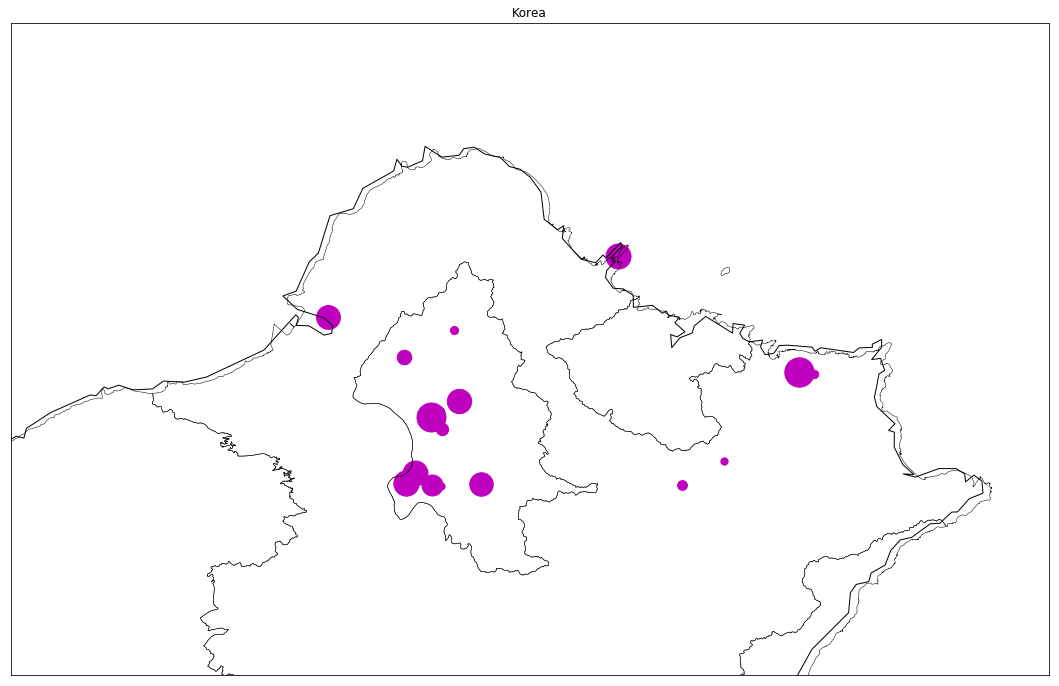

In [190]:
draw_map_newTaipei(ko_spot2,'Korea')

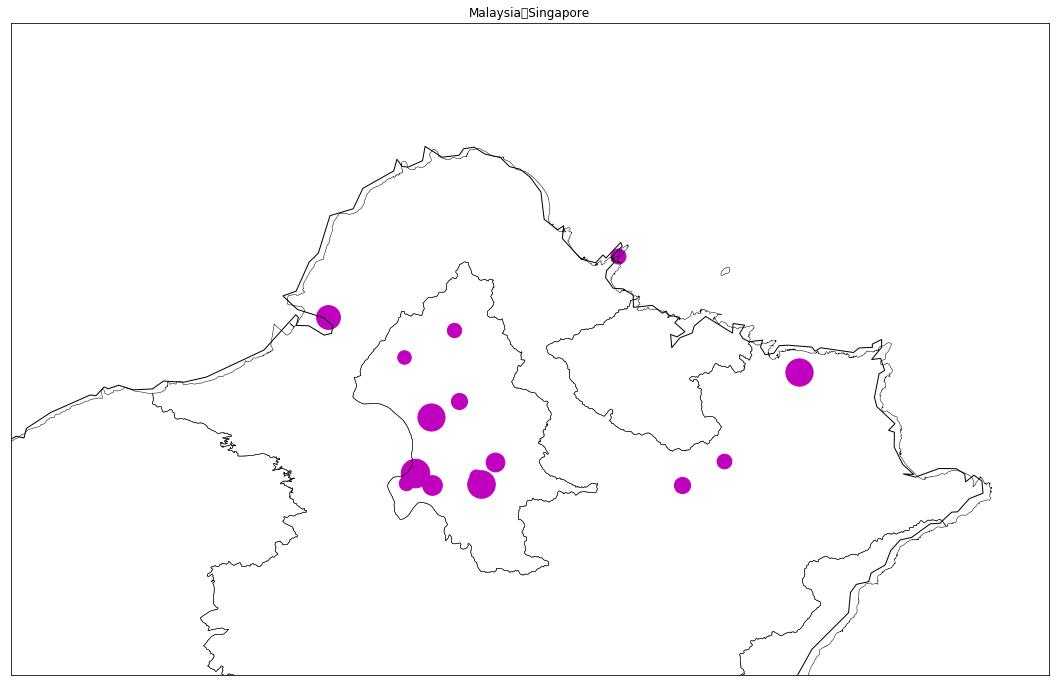

In [213]:
draw_map_newTaipei(as_spot2,'Malaysia＆Singapore')

In [211]:
jp_spot2

,id,number,num_std,name,lon,lat
0,65.0,1558,0.482858,九份,121.845263,25.110289
1,801.0,1403,0.434820,士林夜市,121.524402,25.088953
2,1.0,1169,0.362298,台北101,121.564419,25.034251
3,2.0,1091,0.338125,故宮博物院,121.549254,25.100239
4,8.0,953,0.295355,艋舺龍山寺,121.499922,25.037425
5,3.0,951,0.294736,中正紀念堂,121.521781,25.034933
6,5.0,542,0.167978,西門町,121.507468,25.044905
7,19.0,510,0.158060,行天宮,121.533934,25.063361
8,52.0,500,0.154961,臺北市永康街商圈,121.530137,25.033625
9,6.0,468,0.145043,忠烈祠,121.533128,25.078692


In [210]:
ko_spot2

,id,number,num_std,name,lon,lat
0,65.0,916,0.431611,九份,121.845263,25.110289
1,801.0,894,0.421245,士林夜市,121.524402,25.088953
2,8.0,682,0.321352,艋舺龍山寺,121.499922,25.037425
3,67.0,667,0.314284,野柳,121.693109,25.208919
4,5.0,660,0.310986,西門町,121.507468,25.044905
5,2.0,628,0.295908,故宮博物院,121.549254,25.100239
6,66.0,603,0.284128,淡水(紅毛城、老街、漁人碼頭),121.438455,25.171308
7,1.0,586,0.276118,台北101,121.564419,25.034251
8,3.0,466,0.219575,中正紀念堂,121.521781,25.034933
9,10.0,226,0.106489,北投,121.502671,25.137244


In [209]:
ch_spot2

,id,number,num_std,name,lon,lat
0,1.0,6510,0.374943,台北101,121.564419,25.034251
1,2.0,6096,0.351099,故宮博物院,121.549254,25.100239
2,315.0,5334,0.307212,墾丁國家公園,120.780470,21.948361
3,185.0,4944,0.284750,日月潭,120.915277,23.859680
4,18.0,4712,0.271388,國父紀念館,121.560267,25.040312
5,3.0,4391,0.252900,中正紀念堂,121.521781,25.034933
6,350.0,4337,0.249790,太魯閣、天祥,121.493461,24.186083
7,235.0,4271,0.245988,阿里山,120.802237,23.508408
8,801.0,3785,0.217997,士林夜市,121.524402,25.088953
9,271.0,3760,0.216557,西子灣(打狗領事館),120.265811,22.627032


In [208]:
as_spot2

,id,number,num_std,name,lon,lat
0,5.0,697,0.409033,西門町,121.507468,25.044905
1,1.0,647,0.379691,台北101,121.564419,25.034251
2,65.0,634,0.372061,九份,121.845263,25.110289
3,801.0,626,0.367367,士林夜市,121.524402,25.088953
4,66.0,482,0.282861,淡水(紅毛城、老街、漁人碼頭),121.438455,25.171308
5,185.0,380,0.223002,日月潭,120.915277,23.859680
6,3.0,330,0.193660,中正紀念堂,121.521781,25.034933
7,187.0,308,0.180749,清境農場,121.162834,24.058620
8,803.0,302,0.177228,饒河街夜市,121.577561,25.051137
9,77.0,224,0.131454,平溪,121.738810,25.025580
